# Overview of scikit learn library

***scikit-learn*** is a python compatible machine learning opensource library. It really has a very well documented [Tutorial](https://scikit-learn.org/stable/tutorial/index.html) where users have access to the entire documentation with examples. Even though there are multiple examples in the tutorials, in this notebook we will try to execute some examples and complement the official tutorial.

## Introduction to scikit-learn

scikit-learn has build in datasets already in the library to start making some proofs and test the functionalities. In this case, it has been taken the wine recognition dataset [wine recognition dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine) (Lichman, M. 2013)

In [1]:
from sklearn import datasets
wine=datasets.load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

As we cna see, data is stored as array format, each asset in the array has 13 numeric values. Those values corresponds following attributes (available in [Sklearn library documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset)):

- Alcohol
- Malic acid
- Ash
- alcalinity of ash
- Magnesium
- total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

***wine.data*** gives access to the features that can be used to classify the wines samples

In [2]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

meanwhile ***wine.target*** gives the true corresponding to the class each wine has depending on its composition in the attributes. In case we want to know the name of each type class we can use ***wine.target_names*** to do so.

In [3]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### Learning an predicting

In the case of wine dataset, the task is to predict, given a wine with measurements in each of the 13 parameters listed above, in which class will fall in. an estimator for classification in this case is support vector classification.

In [12]:
from sklearn import svm
clf = svm.SVC(gamma = 0.001, C=100.)

within the estimator, we can use the methods ***fit(X,y)*** and ***predict(T)***. As first instance, ***clf*** instance is first fitted to the model with the aim to learn from the model by passing the training set to the ***fit*** method. In this case, we have used the entire dataset but last value to train model.

In [13]:
clf.fit(wine.data[:-1],wine.target[:-1])

SVC(C=100.0, gamma=0.001)

We use the last value of the dataset to predict its value.

In [14]:
clf.predict(wine.data[-1:])

array([2])

if we just load the target value in the dataset for this exact position, we can see it has the same as the predicting one

In [5]:
wine.target[-1:]

array([2])

### Predicting an output variable from high dimensional observations

The ***wine dataset***  is a classification task where 3 different classes are identified *(class_0, class_1, class_2)* from 13 attributes listed above

In [6]:
import numpy as np

wine_X, wine_Y = datasets.load_wine(return_X_y=True)
np.unique(wine_Y)


array([0, 1, 2])

Here we use K-Nearest neighbors classifier

In [7]:
# Split wine data in train and test data
np.random.seed(0) #random permutation, to split the data randomly
indices = np.random.permutation(len(wine_X))
wine_X_train = wine_X[indices[:-10]]
wine_Y_train = wine_Y[indices[:-10]]
wine_X_test = wine_X[indices[:-10]]
wine_Y_test = wine_Y[indices[:-10]]
# Create and fit nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(wine_X_train, wine_Y_train)
knn.predict(wine_X_test)

array([0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0,
       2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2,
       1, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 1,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1,
       1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2,
       2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1,
       2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1])

In [8]:
wine_Y_test

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 1,
       2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1,
       2, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1,
       2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1,
       1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1])

# Demonstration of three interesting scikit-learn algorithms

This section aims to demonstrate three different scikit-learn algorithms in order to compare different methods.

To perform this task I have selected an interesting dataset from [**Forest Observatory Systems**](https://forest-observation-system.net) to measure the biomass. 

is an international cooperation aiming to establish an in-situ forest biomass database in order to support Earth Observation with reliable, up to date, representative and comparable data for validation (Schepaschenko, D. et al. 2019).

## Quick description of FOS Biomass dataset

In [3]:
#import pandas and geopandas library
import pandas as pd
#import geopandas as gp
## We don't need to download the dataset, by putting the direct url, Pandas will read the file directly
path = (r'https://forest-observation-system.net/Data/FOS_Plots_v2019.04.10.xlsx')
df = pd.read_excel (path)
df.keys()

Index(['Plot_ID', 'Sub-plot_ID', 'CountryName', 'Network', 'Institution',
       'Link', 'YearEstablished', 'YearCensus', 'PI team', 'Lat_cnt',
       'Lon_cnt', 'Altitude', 'Slope, degree', 'PlotArea', 'Plot_shape',
       'Forest_Status', 'MinDBH', 'H_Lorey_local', 'H_Lorey_Chave',
       'H_Lorey_Feldpausch', 'H_max_Local', 'H_max_Chave', 'H_max_Feldpausch',
       'AGB_local', 'AGB_local_Cred_2.5', 'AGB_local_97.5', 'AGB_Feldpausch',
       'AGB_Feldpausch_Cred_2.5', 'AGB_Feldpausch_Cred_97.5', 'AGB_Chave',
       'AGB_ChaveCred_2.5', 'AGB_ChaveCred_97.5', 'Wood density', 'GSV', 'BA',
       'Ndens', 'Reference', 'Other_Measurements',
       'Biomass processing protocol'],
      dtype='object')

By using the ***df.keys*** it displays all the fields within the database

By looking at some relevant data within the database, we could explore the distribution of some of the variables in there.

0.10.1


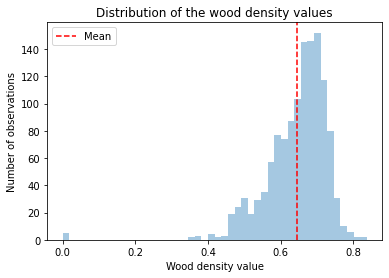

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(df['Wood density'],kde = False)
mean=df['Wood density'].mean()
print(sns.__version__)
plt.axvline(mean, color='r', linestyle='--')
plt.legend({'Mean':mean})
plt.title('Distribution of the wood density values')
plt.xlabel('Wood density value')
plt.ylabel('Number of observations')  
plt.show()

We can see the distribution of wood density values and the mean value per observation.

Text(0.5, 1.0, 'AGB Chave 97.5')

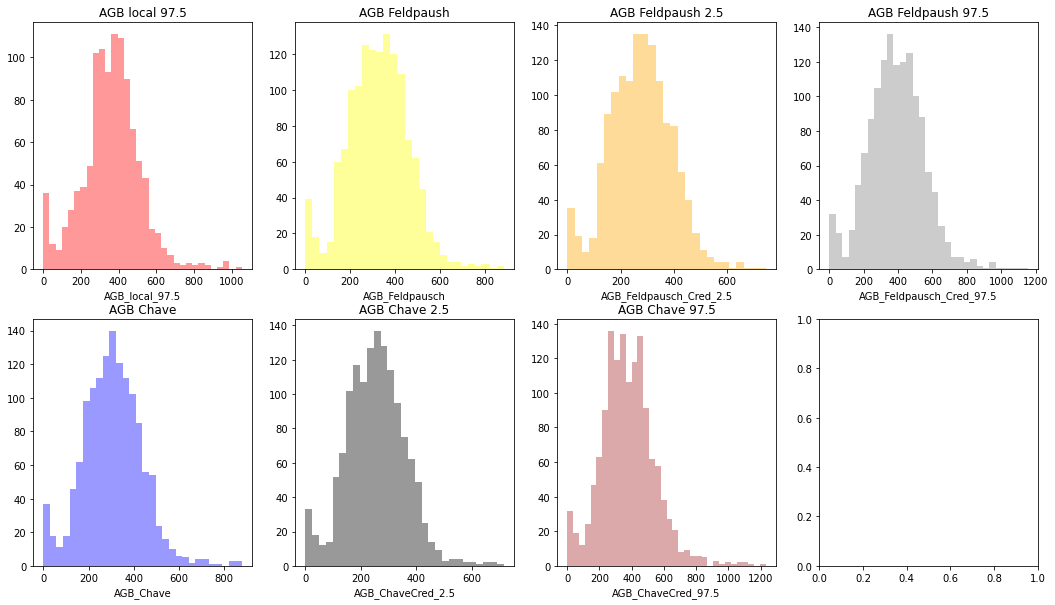

In [5]:
fig, axs = plt.subplots(2, 4,figsize=(18, 10))
sns.distplot(df['AGB_local_97.5'],kde = False,ax=axs[0,0],color='red')
sns.distplot(df['AGB_Feldpausch'],kde = False,ax=axs[0,1],color='yellow')
sns.distplot(df['AGB_Feldpausch_Cred_2.5'],kde = False,ax=axs[0,2],color='orange')
sns.distplot(df['AGB_Feldpausch_Cred_97.5'],kde = False,ax=axs[0,3],color='grey')
sns.distplot(df['AGB_Chave'],kde = False,ax=axs[1,0],color='blue')
sns.distplot(df['AGB_ChaveCred_2.5'],kde = False,ax=axs[1,1],color='black')
sns.distplot(df['AGB_ChaveCred_97.5'],kde = False,ax=axs[1,2],color='brown')
axs[0,0].set_title('AGB local 97.5')
axs[0,1].set_title('AGB Feldpaush')
axs[0,2].set_title('AGB Feldpaush 2.5')
axs[0,3].set_title('AGB Feldpaush 97.5')
axs[1,0].set_title('AGB Chave')
axs[1,1].set_title('AGB Chave 2.5')
axs[1,2].set_title('AGB Chave 97.5')

Above we can compare different above ground biomass measurements within the database

## References

- Lichman, M. (2013). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

- Schepaschenko, D., Chave, J., Phillips, O. L., Lewis, S. L., Davies, S. J., Réjou-Méchain, M., ... & Labrière, N. (2019). The Forest Observation System, building a global reference dataset for remote sensing of forest biomass. Scientific data, 6(1), 1-11
